# Competition overview

**Competition Summary**

This is the PHEMS Hackathon: Pediatric Sepsis Prediction, a machine learning competition focused on developing an algorithm for the early detection of sepsis in pediatric intensive care unit (PICU) patients. Participants are tasked with creating a model that can predict the onset of sepsis up to 6 hours before a clinical diagnosis, using retrospective physiological and clinical time-series data.

Early detection of sepsis is a critical, life-saving intervention. The competition's goal is to create a data-driven solution that can enhance current clinical protocols and improve patient outcomes.

The primary evaluation metric is precision-recall AUC, which is particularly important for imbalanced medical datasets. Secondary metrics like accuracy and F1-score will also be considered. In case of a tie, model interpretability, execution time, and computational resource usage will serve as tiebreakers.

The competition runs from January 13, 2025, to February 5, 2025, and offers a total prize pool of 2,500€ for the top three winning teams.

# Pipeline Overview

**1. Data Integration and Preprocessing**

The pipeline begins by loading and consolidating fragmented patient data from multiple sources, including sepsis labels, device usage, laboratory results, medications, and procedures. It systematically merges these disparate CSV files using pandas.merge to create a unified training and testing dataset. This initial step is critical for providing the model with a holistic view of each patient's clinical history.

**2. Feature Engineering**

This stage focuses on creating meaningful features from the raw data. The notebook calculates the duration of a patient's stay and the average hour of the day for device interactions, both of which are useful temporal features. It also groups and aggregates categorical features, like a patient's history of procedures and drug exposures, into single string values.

**3. Data Splitting and Imputation**

The merged training data is split into a training set and a validation set using a temporal split (80/20). This method is crucial for time-series data to prevent data leakage, ensuring the model's performance is realistically evaluated on future data it has not seen during training. Following the split, the pipeline handles missing values with a multi-strategy approach:

- Mode Imputation for some categorical columns.
- Forward and Backward Fill for other categorical data, which is ideal for time-series data.
- Mean Imputation for all numerical features.

**4. Feature Selection and Transformation**

To reduce dimensionality and improve model performance, the notebook performs feature selection. It uses Mutual Information to measure the dependency between each feature and the target variable, and then drops features with low scores. For text-based categorical data, it uses a Word2Vec model to convert strings into numerical embeddings, making them usable for the model. The numerical features are then scaled and dimensionality is further reduced using Principal Component Analysis (PCA).

**5. Class Imbalance Handling**

Finally, to address the high class imbalance common in medical datasets (where positive sepsis cases are rare), the pipeline uses the SMOTE (Synthetic Minority Over-sampling Technique) algorithm. This technique creates synthetic samples of the minority class to balance the dataset, which helps the model to better learn the patterns associated with sepsis and improves its predictive power.


**6. Model Architecture**

The core of the model is a custom-designed TCN Block. This block leverages 1D causal convolutions to ensure the model's predictions for a given time step are based only on past information. It also incorporates residual connections, which help to improve training by allowing gradients to flow directly through the network. This architecture is particularly effective at capturing complex patterns and dependencies in sequential data. The blocks are stacked with increasing dilation rates, enabling the model to learn both short-term and long-term relationships within the time-series data.

**7. Training Process**

The TCN is compiled for a binary classification task using the Adam optimizer and binary cross-entropy loss. A custom metric, Precision-Recall AUC (pr_auc), is also tracked to specifically address the imbalanced nature of the dataset. To ensure robust training, the pipeline uses several callbacks:

- **EarlyStopping:** This prevents overfitting by monitoring the validation loss and stopping training if it doesn't improve after a certain number of epochs.
- **ReduceLROnPlateau:** This dynamically reduces the learning rate when the model's performance plateaus, which can help the optimizer find a better minimum.

**8. Model Evaluation**

After training, the model's performance is comprehensively evaluated on a dedicated time-series test set. This step assesses how well the model generalizes to unseen data. The evaluation includes a range of critical metrics for classification, such as accuracy, F1-score, precision, recall, and ROC AUC, providing a holistic view of the model's effectiveness in predicting pediatric sepsis.

# Dataset Overview

The dataset for the PHEMS Hackathon is a retrospective collection of pediatric patient data from the Pediatric Intensive Care Unit (PICU) of Hospital Sant Joan de Déu. The data is provided in a time-series format, with each row representing a measurement or event at a specific timestamp during a patient's stay. The dataset is split into training, testing, and a hidden private test set.

The data is organized into several standard tables, each providing a different category of patient information. The core objective is to use these predictor datasets to forecast the SepsisLabel for each patient at every time point in the test set. Importantly, all positive SepsisLabels in the training data have been adjusted to appear 6 hours earlier than the true onset of sepsis, aligning with the competition's goal of early prediction.

# Data Dictionary

The following is a data dictionary for the provided files:

**SepsisLabel_(train|test).csv**

This file contains the target variable for the competition.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-k9u1{border-color:inherit;color:#1B1C1D;font-size:100%;text-align:left;vertical-align:bottom}
.tg .tg-7zrl{text-align:left;vertical-align:bottom}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-k9u1">Column</th>
    <th class="tg-7zrl">Description</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-7zrl">person_id</td>
    <td class="tg-0lax">A unique identifier for each patient.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">measurement_datetime</td>
    <td class="tg-0lax">The specific timestamp of the measurement.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">SepsisLabel</td>
    <td class="tg-0lax">The binary outcome variable: 1 for a positive sepsis assessment, 0 for a negative assessment.</td>
  </tr>
</tbody>
</table>

**devices.csv**

This table records the usage of medical devices.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-k9u1{border-color:inherit;color:#1B1C1D;font-size:100%;text-align:left;vertical-align:bottom}
.tg .tg-7zrl{text-align:left;vertical-align:bottom}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-k9u1">Column</th>
    <th class="tg-7zrl">Description</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-7zrl">visit_occurrence_id</td>
    <td class="tg-0lax">A unique ID for a specific PICU episode.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">device_datetime_hourly</td>
    <td class="tg-0lax">The timestamp (hourly granularity) when the device was used.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">person_id</td>
    <td class="tg-0lax">A unique patient identifier.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">device</td>
    <td class="tg-0lax">The type of medical device used.</td>
  </tr>
</tbody>
</table>

**drugexposure.csv**

This table contains data on drug administration.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-k9u1{border-color:inherit;color:#1B1C1D;font-size:100%;text-align:left;vertical-align:bottom}
.tg .tg-7zrl{text-align:left;vertical-align:bottom}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-k9u1">Column</th>
    <th class="tg-7zrl">Description</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-7zrl">visit_occurrence_id</td>
    <td class="tg-0lax">A unique ID for a specific PICU episode.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">person_id</td>
    <td class="tg-0lax">A unique patient identifier.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">drug_datetime_hourly</td>
    <td class="tg-0lax">The timestamp (hourly granularity) of drug administration.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">drug_concept_id</td>
    <td class="tg-0lax">An identifier for the administered drug.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">quantity</td>
    <td class="tg-0lax">The amount of the drug administered.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">dose_unit_source_value</td>
    <td class="tg-0lax">The unit of measurement for the drug dosage.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">route_concept_id</td>
    <td class="tg-0lax">The route of drug administration (e.g., intravenous).</td>
  </tr>
</tbody></table>

**observation.csv**

This table contains general clinical observations.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-k9u1{border-color:inherit;color:#1B1C1D;font-size:100%;text-align:left;vertical-align:bottom}
.tg .tg-7zrl{text-align:left;vertical-align:bottom}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-k9u1">Column</th>
    <th class="tg-7zrl">Description</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-7zrl">visit_occurrence_id</td>
    <td class="tg-0lax">A unique ID for a specific PICU episode.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">person_id</td>
    <td class="tg-0lax">A unique patient identifier.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">observation_datetime</td>
    <td class="tg-0lax">The timestamp when the observation was made.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">observation_concept_id</td>
    <td class="tg-0lax">A label describing the type of observation.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">valuefilled</td>
    <td class="tg-0lax">The value or description of the observation.</td>
  </tr>
</tbody>
</table>

**person_demographics_episode.csv**

This table contains patient demographic information.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-k9u1{border-color:inherit;color:#1B1C1D;font-size:100%;text-align:left;vertical-align:bottom}
.tg .tg-7zrl{text-align:left;vertical-align:bottom}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-k9u1">Column</th>
    <th class="tg-7zrl">Description</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-7zrl">visit_occurrence_id</td>
    <td class="tg-0lax">A unique ID for a specific PICU episode.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">person_id</td>
    <td class="tg-0lax">A unique patient identifier.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">age_in_months</td>
    <td class="tg-0lax">The patient's age in months.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">gender</td>
    <td class="tg-0lax">The patient's gender.</td>
  </tr>
</tbody>
</table>

**proceduresoccurrences.csv**

This table lists all procedures performed on a patient.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-k9u1{border-color:inherit;color:#1B1C1D;font-size:100%;text-align:left;vertical-align:bottom}
.tg .tg-7zrl{text-align:left;vertical-align:bottom}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-k9u1">Column</th>
    <th class="tg-7zrl">Description</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-7zrl">visit_occurrence_id</td>
    <td class="tg-0lax">A unique ID for a specific PICU episode.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">person_id</td>
    <td class="tg-0lax">A unique patient identifier.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">procedure_datetime_hourly</td>
    <td class="tg-0lax">The timestamp (hourly granularity) when the procedure was performed.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">procedure</td>
    <td class="tg-0lax">The name of the procedure performed.</td>
  </tr>
</tbody>
</table>

**measurement_lab.csv, measurement_meds.csv, measurement_observation.csv**

These files contain various lab measurements, medication administrations, and clinical observations. Specific column names are not provided in the description, but they would typically include person_id, measurement_datetime, and a series of columns for different lab tests, vital signs, or observations.

### [Link to competition](https://www.kaggle.com/competitions/phems-hackathon-early-sepsis-prediction/data?select=SepsisLabel_sample_submission.csv)

### [Model Submission Notebook](https://www.kaggle.com/code/misterfour/phems-hackathon-submission)

# Import libraries and configurations

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/phems-hackathon-early-sepsis-prediction/SepsisLabel_sample_submission.csv
/kaggle/input/phems-hackathon-early-sepsis-prediction/training_data/drugsexposure_train.csv
/kaggle/input/phems-hackathon-early-sepsis-prediction/training_data/observation_train.csv
/kaggle/input/phems-hackathon-early-sepsis-prediction/training_data/devices_train.csv
/kaggle/input/phems-hackathon-early-sepsis-prediction/training_data/measurement_lab_train.csv
/kaggle/input/phems-hackathon-early-sepsis-prediction/training_data/proceduresoccurrences_train.csv
/kaggle/input/phems-hackathon-early-sepsis-prediction/training_data/person_demographics_episode_train.csv
/kaggle/input/phems-hackathon-early-sepsis-prediction/training_data/SepsisLabel_train.csv
/kaggle/input/phems-hackathon-early-sepsis-prediction/training_data/measurement_observation_train.csv
/kaggle/input/phems-hackathon-early-sepsis-prediction/training_data/measurement_meds_train.csv
/kaggle/input/phems-hackathon-early-sepsis-prediction/tes

In [2]:
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 78.9 MB/s eta 0:00:00:00:01:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.


In [3]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import joblib
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Dense, Dropout, Conv1D, GlobalAveragePooling1D,
    BatchNormalization, Activation, Add, LSTM, MultiHeadAttention,
    LayerNormalization, Bidirectional
)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import (
    precision_recall_curve, auc, accuracy_score, f1_score,
    roc_auc_score, precision_score, recall_score
)
pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')

2025-09-03 15:06:23.727861: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756911983.926703      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756911983.983065      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Load Dataset and Data Preprocessing

The initial phase focuses on consolidating fragmented patient data from various sources into a single, cohesive dataset. This is a form of data integration, a crucial step that provides the predictive model with a holistic view of each patient’s health.

**Merging DataFrames:** 

The code systematically merges multiple CSV files (e.g., SepsisLabel_train.csv, devices_train.csv, measurement_lab_train.csv) using pandas.merge. The use of a left merge (how='left') is theoretically sound, as it preserves all records from the primary SepsisLabel table while enriching them with corresponding information from other tables, such as laboratory results, vital signs, and medication records.

**Data preprocessing:** 

The pipeline creates new features by leveraging the temporal nature of the data, a core concept in time-series analysis. For each patient (person_id), the code calculates:
- **duration:** The total length of a patient's stay, derived by finding the time difference between their first and last recorded measurements. The theory behind this is that the duration of a patient's hospitalization can be a strong indicator of the severity of their illness.
- **device_mean_hour:** The average hour of the day a patient interacted with a device. This feature can reveal important patterns of care or patient behavior that may be predictive of their condition.

In [4]:
# Load test data
train_sepsislabel = pd.read_csv('/kaggle/input/phems-hackathon-early-sepsis-prediction/training_data/SepsisLabel_train.csv')
train_sepsislabel['measurement_datetime'] = pd.to_datetime(train_sepsislabel['measurement_datetime'])

# Convert 'measurement_datetime' to datetime
train_sepsislabel['measurement_datetime'] = pd.to_datetime(train_sepsislabel['measurement_datetime'])

# Calculate duration for each person_id
train_sepsislabel['duration'] = train_sepsislabel.groupby('person_id')['measurement_datetime'].transform(lambda x: (x.max() - x.min()).total_seconds()/3600)

train_devices = pd.read_csv('/kaggle/input/phems-hackathon-early-sepsis-prediction/training_data/devices_train.csv')

train_devices_grouped = train_devices.groupby('person_id')['device'].agg(lambda x: ', '.join(x.unique())).reset_index()
train_devices_grouped = pd.DataFrame(train_devices_grouped)

# Drop specified columns
train_devices_hr = train_devices.copy()
train_devices_hr = train_devices_hr.drop(columns=['visit_occurrence_id', 'device'])

# Convert 'device_datetime_hourly' to datetime objects
train_devices_hr['device_datetime_hourly'] = pd.to_datetime(train_devices_hr['device_datetime_hourly'])

# Extract the hour from the datetime column
train_devices_hr['device_hour'] = train_devices_hr['device_datetime_hourly'].dt.hour

# Group by 'person_id' and calculate the mean hour
mean_hours = train_devices_hr.groupby('person_id')['device_hour'].mean().reset_index()
mean_hours['device_mean_hour'] = mean_hours['device_hour']

# Merge the mean hour back into the original DataFrame
train_devices_hr = pd.merge(train_devices_hr, mean_hours[['person_id', 'device_mean_hour']], on='person_id', how='left')

# Remove duplicate 'person_id' rows (keeping the first occurrence)
train_devices_hr = train_devices_hr.drop_duplicates(subset='person_id')
train_devices_hr = train_devices_hr.drop(columns='device_datetime_hourly')

train_devices_merge = pd.merge(train_devices_grouped, train_devices_hr, on='person_id', how='left')

merged_train = pd.merge(train_sepsislabel, train_devices_merge, on='person_id', how='left')

train_lab=pd.read_csv('/kaggle/input/phems-hackathon-early-sepsis-prediction/training_data/measurement_lab_train.csv')

train_lab = train_lab.groupby(['person_id','measurement_datetime'])[['Base excess in Venous blood by calculation',
       'Base excess in Arterial blood by calculation',
       'Phosphate [Moles/volume] in Serum or Plasma',
       'Potassium [Moles/volume] in Blood',
       'Bilirubin.total [Moles/volume] in Serum or Plasma',
       'Neutrophil Ab [Units/volume] in Serum',
       'Bicarbonate [Moles/volume] in Arterial blood',
       'Hematocrit [Volume Fraction] of Blood',
       'Glucose [Moles/volume] in Serum or Plasma',
       'Calcium [Moles/volume] in Serum or Plasma',
       'Chloride [Moles/volume] in Blood',
       'Sodium [Moles/volume] in Serum or Plasma',
       'C reactive protein [Mass/volume] in Serum or Plasma',
       'Carbon dioxide [Partial pressure] in Venous blood',
       'Oxygen [Partial pressure] in Venous blood',
       'Albumin [Mass/volume] in Serum or Plasma',
       'Bicarbonate [Moles/volume] in Venous blood',
       'Oxygen [Partial pressure] in Arterial blood',
       'Carbon dioxide [Partial pressure] in Arterial blood',
       'Interleukin 6 [Mass/volume] in Body fluid',
       'Magnesium [Moles/volume] in Blood', 'Prothrombin time (PT)',
       'Procalcitonin [Mass/volume] in Serum or Plasma',
       'Lactate [Moles/volume] in Blood', 'Creatinine [Mass/volume] in Blood',
       'Fibrinogen measurement', 'Bilirubin measurement',
       'Partial thromboplastin time', ' activated', 'Total white blood count',
       'Platelet count', 'White blood cell count', 'Blood venous pH',
       'D-dimer level', 'Blood arterial pH',
       'Hemoglobin [Moles/volume] in Blood', 'Ionised calcium measurement']].sum().reset_index()

# Ensure 'measurement_datetime' is converted to datetime64[ns] in all DataFrames
def ensure_datetime(df, datetime_column):
    df[datetime_column] = pd.to_datetime(df[datetime_column], errors='coerce')
    return df

# Convert 'measurement_datetime' to datetime in all relevant DataFrames
train_sepsislabel = ensure_datetime(train_sepsislabel, 'measurement_datetime')
train_lab = ensure_datetime(train_lab, 'measurement_datetime')

# Merge the DataFrames
merged_train = pd.merge(merged_train, train_lab, on=['person_id', 'measurement_datetime'], how='left')

train_meds=pd.read_csv('/kaggle/input/phems-hackathon-early-sepsis-prediction/training_data/measurement_meds_train.csv')

train_meds = train_meds.groupby(['person_id','measurement_datetime'])[['Systolic blood pressure', 'Diastolic blood pressure',
       'Body temperature', 'Respiratory rate', 'Heart rate',
       'Measurement of oxygen saturation at periphery',
       'Oxygen/Gas total [Pure volume fraction] Inhaled gas']].sum().reset_index()

# Ensure 'measurement_datetime' is converted to datetime64[ns] in all DataFrames
def ensure_datetime(df, datetime_column):
    df[datetime_column] = pd.to_datetime(df[datetime_column], errors='coerce')
    return df

# Convert 'measurement_datetime' to datetime in all relevant DataFrames
merged_train = ensure_datetime(merged_train, 'measurement_datetime')
train_meds = ensure_datetime(train_meds, 'measurement_datetime')

# Merge the DataFrames
merged_train = pd.merge(merged_train, train_meds, on=['person_id', 'measurement_datetime'], how='left')

train_obs=pd.read_csv('/kaggle/input/phems-hackathon-early-sepsis-prediction/training_data/measurement_observation_train.csv')

train_obs = train_obs.groupby(['person_id','measurement_datetime'])[['Left pupil Diameter Auto', 'Right pupil Diameter Auto',
       'Glasgow coma scale', 'Capillary refill [Time]', 'Pulse',
       'Arterial pulse pressure', 'Right pupil Pupillary response',
       'Left pupil Pupillary response']].sum().reset_index()

train_obs

# Ensure 'measurement_datetime' is converted to datetime64[ns] in all DataFrames
def ensure_datetime(df, datetime_column):
    df[datetime_column] = pd.to_datetime(df[datetime_column], errors='coerce')
    return df

# Convert 'measurement_datetime' to datetime in all relevant DataFrames
merged_train = ensure_datetime(merged_train, 'measurement_datetime')
train_obs = ensure_datetime(train_obs, 'measurement_datetime')

# Merge the DataFrames
merged_train = pd.merge(merged_train, train_obs, on=['person_id', 'measurement_datetime'], how='left')

# Load the data
train_procedure = pd.read_csv('/kaggle/input/phems-hackathon-early-sepsis-prediction/training_data/proceduresoccurrences_train.csv')

# Convert 'procedure_datetime_hourly' to datetime
train_procedure['procedure_datetime_hourly'] = pd.to_datetime(train_procedure['procedure_datetime_hourly'])

# Calculate duration in hours for each person_id
train_procedure['procedure_duration'] = train_procedure.groupby('person_id')['procedure_datetime_hourly'].transform(lambda x: (x.max() - x.min()).total_seconds() / 3600)
train_procedure_A = train_procedure[['person_id','procedure_duration']]
train_procedure_A = train_procedure_A.drop_duplicates(subset=['person_id'])

# Group by 'person_id' and aggregate 'device' by joining values with a separator (e.g., ', ')
train_procedure_grouped = train_procedure.groupby('person_id')[['procedure']].agg(lambda x: ', '.join(x.unique())).reset_index()

# Merge the DataFrames
merged_train = pd.merge(merged_train, train_procedure_grouped, on='person_id', how='left')

# Merge the DataFrames
merged_train = pd.merge(merged_train, train_procedure_A, on='person_id', how='left')

# Sort value by measurement_datetime column
merged_train = merged_train.sort_values(by='measurement_datetime')

train_drug=pd.read_csv('/kaggle/input/phems-hackathon-early-sepsis-prediction/training_data/drugsexposure_train.csv')

train_drug=train_drug[['person_id','drug_datetime_hourly','drug_concept_id','route_concept_id']]

train_drug['route_concept_id'] = train_drug['route_concept_id'].astype(str)

# Convert 'drug_datetime_hourly' to datetime
train_drug['drug_datetime_hourly'] = pd.to_datetime(train_drug['drug_datetime_hourly'])

# Calculate duration for each person_id
train_drug['drug_duration'] = train_drug.groupby('person_id')['drug_datetime_hourly'].transform(lambda x: (x.max() - x.min()).total_seconds()/3600)
train_drug_A = train_drug[['person_id','drug_duration']]
train_drug_A = train_drug_A.drop_duplicates(subset=['person_id'])

# Group by 'person_id' and aggregate 'device' by joining values with a separator (e.g., ', ')
train_drug_grouped = train_drug.groupby(['person_id'])[['drug_concept_id','route_concept_id']].agg(lambda x: ', '.join(x.unique())).reset_index()
train_drug_grouped = pd.DataFrame(train_drug_grouped)

# Merge the DataFrames on the 'person_id' column
merged_train = pd.merge(merged_train, train_drug_grouped, on='person_id', how='left')

# Merge the DataFrames on the 'person_id' column
merged_train = pd.merge(merged_train, train_drug_A, on='person_id', how='left')

train_observation=pd.read_csv('/kaggle/input/phems-hackathon-early-sepsis-prediction/training_data/observation_train.csv')

# Convert 'drug_datetime_hourly' to datetime
train_observation['observation_datetime'] = pd.to_datetime(train_observation['observation_datetime'])

# Calculate duration for each person_id
train_observation['observation_duration'] = train_observation.groupby('person_id')['observation_datetime'].transform(lambda x: (x.max() - x.min()).total_seconds()/3600)
train_observation_A = train_observation[['person_id','observation_duration']]
train_observation_A = train_observation_A.drop_duplicates(subset=['person_id'])
train_observation = train_observation.groupby('person_id')[['observation_concept_name','valuefilled']].agg(lambda x: ', '.join(x.unique())).reset_index()
merged_train = pd.merge(merged_train, train_observation_A, on='person_id', how='left')
merged_train = pd.merge(merged_train, train_observation, on='person_id', how='left')

# Convert 'measurement_datetime' to datetime (if not already done)
merged_train['measurement_datetime'] = pd.to_datetime(merged_train['measurement_datetime'], errors='coerce')

# Drop rows where 'measurement_datetime' is NaN/NaT
# merged_train = merged_train.dropna(subset=['measurement_datetime'])
# Sort the DataFrame by 'measurement_datetime' from earliest to latest (ascending order)
merged_train = merged_train.sort_values(by='measurement_datetime')

merged_train.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,person_id,measurement_datetime,SepsisLabel,duration,device,device_hour,device_mean_hour,Base excess in Venous blood by calculation,Base excess in Arterial blood by calculation,Phosphate [Moles/volume] in Serum or Plasma,...,Right pupil Pupillary response,Left pupil Pupillary response,procedure,procedure_duration,drug_concept_id,route_concept_id,drug_duration,observation_duration,observation_concept_name,valuefilled
0,1089329724,2018-12-23 16:00:00,0,13991.0,"Urinary catheter, Central venous catheter",17.0,11.5,0.0,0.0,0.0,...,NaN,NaN,"Cannulation, Non-invasive ventilation",7272.0,"erythromycin, gentamicin, ampicillin, dopamine...","Topical, Intravenous, Oral, Otic",13891.0,6891.0,Primary reason for admission,"Quirúrgico - Electivo, Médico"
1,1089329724,2018-12-24 16:00:00,0,13991.0,"Urinary catheter, Central venous catheter",17.0,11.5,NaN,NaN,NaN,...,NaN,NaN,"Cannulation, Non-invasive ventilation",7272.0,"erythromycin, gentamicin, ampicillin, dopamine...","Topical, Intravenous, Oral, Otic",13891.0,6891.0,Primary reason for admission,"Quirúrgico - Electivo, Médico"
2,1089329724,2018-12-25 14:00:00,0,13991.0,"Urinary catheter, Central venous catheter",17.0,11.5,0.0,0.0,0.0,...,NaN,NaN,"Cannulation, Non-invasive ventilation",7272.0,"erythromycin, gentamicin, ampicillin, dopamine...","Topical, Intravenous, Oral, Otic",13891.0,6891.0,Primary reason for admission,"Quirúrgico - Electivo, Médico"
3,1702473143,2019-01-07 09:00:00,0,35646.0,NaN,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,"Exteriorization of trachea, Cannulation",28221.0,"methylprednisolone, prednisolone, ciprofloxaci...","Intravenous, Oral, Intrapulmonary, Topical",30453.0,33358.0,Primary reason for admission,"Médico, Quirúrgico - Electivo"
4,1702473143,2019-01-07 10:00:00,0,35646.0,NaN,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,"Exteriorization of trachea, Cannulation",28221.0,"methylprednisolone, prednisolone, ciprofloxaci...","Intravenous, Oral, Intrapulmonary, Topical",30453.0,33358.0,Primary reason for admission,"Médico, Quirúrgico - Electivo"


In [5]:
merged_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 331653 entries, 0 to 331652
Data columns (total 67 columns):
 #   Column                                               Non-Null Count   Dtype         
---  ------                                               --------------   -----         
 0   person_id                                            331653 non-null  int64         
 1   measurement_datetime                                 331637 non-null  datetime64[ns]
 2   SepsisLabel                                          331653 non-null  int64         
 3   duration                                             331643 non-null  float64       
 4   device                                               226288 non-null  object        
 5   device_hour                                          226288 non-null  float64       
 6   device_mean_hour                                     226288 non-null  float64       
 7   Base excess in Venous blood by calculation           68105 non-null   float64  

# Data Splitting

This step is to split the dataset into training and testing sets. This is a crucial step for evaluating a model's performance on unseen data. For this time-series problem, the code uses a specific method to prevent a critical error known as data leakage.

The code first separates the features (all columns except SepsisLabel) from the target variable (y). It then performs a temporal split by dividing the data chronologically. The first 80% of the rows (x_train, y_train) are used for training the model, and the remaining 20% (x_test, y_test) are reserved for evaluating its performance.

The temporal split is a cornerstone of time-series machine learning. It's based on the theory that a model should only be trained on past data to predict future outcomes. A random split would introduce data leakage by allowing the model to "see" future events during training, leading to an unrealistically high performance score that would not hold up in a real-world scenario.

In [6]:
# Drop the 'SepsisLabel' column for features
merged_train_features = merged_train.drop(columns=['SepsisLabel'])

# Keep the 'SepsisLabel' column for target labels
y = merged_train['SepsisLabel']

# Calculate the split point
split_point = int(len(merged_train_features) * 0.8)

# Split the features into training and testing sets
x_train = merged_train_features.iloc[:split_point]  # First 80% for training
x_test = merged_train_features.iloc[split_point:]   # Remaining 20% for testing

# Split the target labels into training and testing sets
y_train = y.iloc[:split_point]  # First 80% for training
y_test = y.iloc[split_point:]   # Remaining 20% for testing

# Check the shapes of the resulting datasets
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (265322, 66)
x_test shape: (66331, 66)
y_train shape: (265322,)
y_test shape: (66331,)


# Missing Value Imputation

This section addresses missing data, a common problem in real-world datasets that can severely impact model performance. The code categorizes features into numerical, categorical, and datetime types. It then uses different imputation strategies for each data type:

- Mode Imputation: Missing values in extra_cols (a subset of categorical columns) are filled with the mode (the most frequent value). This is effective for nominal data where the most common category is a reasonable guess.
- Forward and Backward Fill: Missing values in the main categorical_cols are filled using a combination of forward fill (ffill) and backward fill (bfill). This approach is particularly useful for time-series data, as it assumes that a missing value is likely the same as the previous or next recorded value.
- Mean Imputation: Missing values in numerical_cols are filled with the mean of their respective columns. This is a simple and fast method, as the mean can provide a good estimate for missing numerical data.
- Mean for Datetime: Missing values in the date_time column are also filled with the mean, which is an unconventional but functional approach to handle missing timestamps in this context.


Imputation is the process of replacing missing data with substituted values. The choice of method depends on the nature of the data and the underlying assumptions.

- Mean/Median Imputation: These methods are based on the assumption that the missing values are similar to the overall distribution of the non-missing data. Mean imputation is sensitive to outliers, while median imputation is more robust.
- Mode Imputation: This is the standard for categorical data as it fills in missing categories with the one that appears most often.
- Forward/Backward Fill: These methods leverage the sequential nature of time-series data. They assume that values are stable over short periods, making the previous or next observation a good proxy for the missing one.

In [7]:
date_time = ['measurement_datetime']
numerical_cols = ['person_id',
 'duration',
 'device_hour',
 'device_mean_hour',
 'Base excess in Venous blood by calculation',
 'Base excess in Arterial blood by calculation',
 'Phosphate [Moles/volume] in Serum or Plasma',
 'Potassium [Moles/volume] in Blood',
 'Bilirubin.total [Moles/volume] in Serum or Plasma',
 'Neutrophil Ab [Units/volume] in Serum',
 'Bicarbonate [Moles/volume] in Arterial blood',
 'Hematocrit [Volume Fraction] of Blood',
 'Glucose [Moles/volume] in Serum or Plasma',
 'Calcium [Moles/volume] in Serum or Plasma',
 'Chloride [Moles/volume] in Blood',
 'Sodium [Moles/volume] in Serum or Plasma',
 'C reactive protein [Mass/volume] in Serum or Plasma',
 'Carbon dioxide [Partial pressure] in Venous blood',
 'Oxygen [Partial pressure] in Venous blood',
 'Albumin [Mass/volume] in Serum or Plasma',
 'Bicarbonate [Moles/volume] in Venous blood',
 'Oxygen [Partial pressure] in Arterial blood',
 'Carbon dioxide [Partial pressure] in Arterial blood',
 'Interleukin 6 [Mass/volume] in Body fluid',
 'Magnesium [Moles/volume] in Blood',
 'Prothrombin time (PT)',
 'Procalcitonin [Mass/volume] in Serum or Plasma',
 'Lactate [Moles/volume] in Blood',
 'Creatinine [Mass/volume] in Blood',
 'Fibrinogen measurement',
 'Bilirubin measurement',
 'Partial thromboplastin time',
 ' activated',
 'Total white blood count',
 'Platelet count',
 'White blood cell count',
 'Blood venous pH',
 'D-dimer level',
 'Blood arterial pH',
 'Hemoglobin [Moles/volume] in Blood',
 'Ionised calcium measurement',
 'Systolic blood pressure',
 'Diastolic blood pressure',
 'Body temperature',
 'Respiratory rate',
 'Heart rate',
 'Measurement of oxygen saturation at periphery',
 'Oxygen/Gas total [Pure volume fraction] Inhaled gas',
 'Left pupil Diameter Auto',
 'Right pupil Diameter Auto',
 'Glasgow coma scale',
 'procedure_duration',
 'drug_duration',
 'observation_duration']
categorical_cols = ['device',
 'Capillary refill [Time]',
 'Pulse',
 'Arterial pulse pressure',
 'Right pupil Pupillary response',
 'Left pupil Pupillary response',
 'procedure',
 'drug_concept_id',
 'route_concept_id',
 'observation_concept_name',
 'valuefilled']

extra_cols = [
 'Right pupil Pupillary response',
 'Left pupil Pupillary response']

# Fill missing values for extra columns using the mode of each column
x_train.loc[:, extra_cols] = x_train[extra_cols].apply(lambda col: col.fillna(col.mode()[0]), axis=0)
x_test.loc[:, extra_cols] = x_test[extra_cols].apply(lambda col: col.fillna(col.mode()[0]), axis=0)

# Fill missing values for categorical columns using forward fill and backward fill
x_train.loc[:, categorical_cols] = x_train[categorical_cols].ffill().bfill()
x_test.loc[:, categorical_cols] = x_test[categorical_cols].ffill().bfill()

# Fill missing values for numerical columns using the mean of each column
x_train.loc[:, numerical_cols] = x_train[numerical_cols].fillna(x_train[numerical_cols].mean())
x_test.loc[:, numerical_cols] = x_test[numerical_cols].fillna(x_test[numerical_cols].mean())

# Fill missing values for datetime columns using the mean of each column
x_train.loc[:, date_time] = x_train[date_time].fillna(x_train[date_time].mean())
x_test.loc[:, date_time] = x_test[date_time].fillna(x_test[date_time].mean())

# Display the DataFrame after filling missing values
print(x_train.isnull().sum())
print(x_test.isnull().sum())

person_id                   0
measurement_datetime        0
duration                    0
device                      0
device_hour                 0
                           ..
route_concept_id            0
drug_duration               0
observation_duration        0
observation_concept_name    0
valuefilled                 0
Length: 66, dtype: int64
person_id                   0
measurement_datetime        0
duration                    0
device                      0
device_hour                 0
                           ..
route_concept_id            0
drug_duration               0
observation_duration        0
observation_concept_name    0
valuefilled                 0
Length: 66, dtype: int64


In [8]:
x_train.drop('measurement_datetime', axis=1, inplace=True)
x_test.drop('measurement_datetime', axis=1, inplace=True)

/tmp/ipykernel_36/3498404375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.drop('measurement_datetime', axis=1, inplace=True)
/tmp/ipykernel_36/3498404375.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test.drop('measurement_datetime', axis=1, inplace=True)


# Correlation Analysis & Feature Selection

This section evaluates the relationship between each feature and the target variable to identify the most relevant predictors and remove irrelevant ones. The code first combines the training features (x_train) and target labels (y_train) into a single DataFrame. It then performs two key steps:

- Ordinal Encoding: It converts categorical columns into numerical representations using OrdinalEncoder. This is a prerequisite for calculating Mutual Information, which requires numerical inputs. Ordinal encoding assigns an integer to each category, assuming an ordered relationship between them.
- Mutual Information (MI) Calculation: It calculates the Mutual Information score for each feature with respect to the SepsisLabel target. This score measures the dependency between two variables, indicating how much knowing the value of a feature reduces uncertainty about the target variable. The code uses parallel processing (joblib) to speed up this calculation. The results are aggregated and sorted to identify the most important features.

**Feature Selection**

Feature selection is the process of choosing a subset of relevant features for use in model construction. This reduces model complexity, improves performance, and makes the model more interpretable.

**Mutual Information**

Mutual Information (MI) measures the mutual dependency between two variables. Unlike a simple correlation coefficient, MI can detect non-linear relationships. A high MI score indicates a strong relationship, while a score of zero means the variables are independent. By ranking features by their MI score, we can identify those that are most predictive of the target variable.

In [9]:
df_tr_corr = pd.concat([x_train, y_train], axis=1).copy()
featurex = df_tr_corr.drop(['SepsisLabel'], axis=1)
featurey = df_tr_corr[['SepsisLabel']]

print("featurex", featurex.shape)
print("featurey", featurey.shape)
print('-------------------------------------------------------------------------')

featurex (265322, 65)
featurey (265322, 1)
-------------------------------------------------------------------------


In [10]:
# Identify categorical columns
categorical_cols = featurex.select_dtypes(include=['object']).columns.to_list()

# Convert all categorical columns to strings to avoid mixed types
for col in categorical_cols:
    featurex[col] = featurex[col].astype(str)

# Apply OrdinalEncoder to categorical columns
ordinal = OrdinalEncoder()
for col in categorical_cols:
    featurex[[col]] = ordinal.fit_transform(featurex[[col]])

# Mutual Information Calculation
from sklearn.feature_selection import mutual_info_regression
from joblib import Parallel, delayed

# Flatten featurey to a one-dimensional format (if needed)
# y_flattened = featurey.values.ravel()  # Converts to 1D array

# Calculate mutual information scores for each feature with respect to each target
X, y = featurex, featurey

def calculate_mi_for_target(target_index):
    return mutual_info_regression(X, y.iloc[:, target_index], random_state=42)

# Run parallelized MI calculations on the original y (multi-dimensional)
mi_scores = Parallel(n_jobs=-1)(delayed(calculate_mi_for_target)(i) for i in range(y.shape[1]))

# Convert the list of scores to a DataFrame
mi_scores_df = pd.DataFrame(mi_scores, columns=featurex.columns, index=featurey.columns)
print("\nMutual Information Scores for each feature with respect to each target:")
mi_scores_df


Mutual Information Scores for each feature with respect to each target:


,person_id,duration,device,device_hour,device_mean_hour,Base excess in Venous blood by calculation,Base excess in Arterial blood by calculation,Phosphate [Moles/volume] in Serum or Plasma,Potassium [Moles/volume] in Blood,Bilirubin.total [Moles/volume] in Serum or Plasma,...,Right pupil Pupillary response,Left pupil Pupillary response,procedure,procedure_duration,drug_concept_id,route_concept_id,drug_duration,observation_duration,observation_concept_name,valuefilled
SepsisLabel,0.048681,0.046983,0.017277,0.008438,0.035534,0.000253,0.001523,0.000908,0.000742,0.000641,...,0.0,0.000021,0.019047,0.038582,0.047252,0.006994,0.046447,0.025377,0.0,0.00117


In [11]:
# Aggregate scores across all targets (e.g., by averaging)
aggregated_mi_scores = mi_scores_df.mean(axis=0).sort_values(ascending=False)
print("\nAggregated Mutual Information Scores:")
aggregated_mi_scores


Aggregated Mutual Information Scores:


person_id                                              0.048681
drug_concept_id                                        0.047252
duration                                               0.046983
drug_duration                                          0.046447
procedure_duration                                     0.038582
                                                         ...   
Carbon dioxide [Partial pressure] in Arterial blood    0.000000
Capillary refill [Time]                                0.000000
Left pupil Diameter Auto                               0.000000
Arterial pulse pressure                                0.000000
Right pupil Pupillary response                         0.000000
Length: 65, dtype: float64

In [12]:
# Additional statistics
print("\nMutual Information Scores Statistics:")
mi_scores_df.T.describe()


Mutual Information Scores Statistics:


,SepsisLabel
count,65.000000
mean,0.005996
std,0.013067
min,0.000000
25%,0.000000
50%,0.000742
75%,0.002821
max,0.048681


In [13]:
aggregated_mi_scores.describe()

count    65.000000
mean      0.005996
std       0.013067
min       0.000000
25%       0.000000
50%       0.000742
75%       0.002821
max       0.048681
dtype: float64

# Noise Feature Reduction

The final part of the code removes features identified as irrelevant or "noise" based on the feature selection. A pre-defined list of columns, likely based on the low Mutual Information scores from the previous step, is created. The code then uses the .drop() method to permanently remove these columns from both the training (x_train) and testing (x_test) datasets. The final shape of the datasets is printed to confirm the removal of these features.

**Noise reduction**

Noise reduction refers to the process of eliminating irrelevant or redundant features that can degrade model performance. Features with very low predictive power (e.g., those with low MI scores) are considered "noise" because they do not contribute meaningfully to the prediction and may even confuse the model. Removing them improves the signal-to-noise ratio of the dataset, leading to a more efficient and accurate model. This step is a direct application of the insights gained from the feature selection analysis, streamlining the dataset to focus on the most important variables.

In [14]:
columns_to_drop = [
    'person_id',
    "Calcium [Moles/volume] in Serum or Plasma",
    "Left pupil Pupillary response",
    "Capillary refill [Time]",
    "Arterial pulse pressure",
    "Left pupil Diameter Auto",
    "Right pupil Pupillary response",
    "observation_concept_name",
    "Neutrophil Ab [Units/volume] in Serum",
    "Heart rate",
    "Interleukin 6 [Mass/volume] in Body fluid",
    "Glucose [Moles/volume] in Serum or Plasma",
    "C reactive protein [Mass/volume] in Serum or Plasma",
    "Oxygen [Partial pressure] in Venous blood",
    "Albumin [Mass/volume] in Serum or Plasma",
    "Oxygen [Partial pressure] in Arterial blood",
    "Carbon dioxide [Partial pressure] in Arterial blood",
    "Lactate [Moles/volume] in Blood",
    "D-dimer level",
    "Bilirubin measurement",
    " activated",  # Note: There might be a typo here (extra space at the beginning)
    "Total white blood count",
    "Platelet count",
    "White blood cell count",
    "Bicarbonate [Moles/volume] in Arterial blood",
    "Blood venous pH"
]
# Drop columns from x_train
x_train = x_train.drop(columns=columns_to_drop)

# Drop columns from x_test
x_test = x_test.drop(columns=columns_to_drop)

print("x_train shape after dropping columns:", x_train.shape)
print("x_test shape after dropping columns:", x_test.shape)

x_train shape after dropping columns: (265322, 39)
x_test shape after dropping columns: (66331, 39)


# Feature Engineering

This section performs a feature engineering to transform raw data into a format suitable for neural network. The process involves handling textual data, standardizing numerical features, reducing dimensionality, and addressing class imbalance.

1. **Text to Numerical Embedding with Word2Vec**

    This is the most complex part of the pipeline, focusing on converting unstructured text data from columns like device and procedure into numerical vectors. The code first identifies a list of text-based columns. It then performs the following steps:
    - Tokenization: The text in each of the selected columns is split into individual words or tokens. For example, "Central venous catheter" becomes ["Central", "venous", "catheter"]. This creates a corpus (a collection of all text).
    - Word2Vec Model Training: A Word2Vec model is trained on this corpus. This model learns to represent each unique word as a dense numerical vector (an "embedding"). Words with similar meanings or contexts in the corpus are placed closer to each other in this vector space.
    - Embedding Transformation: A custom TextToEmbeddingTransformer class is created to apply the trained Word2Vec model. For each row, it tokenizes the text in a given column and retrieves the vector for each token. It then calculates the mean of all these vectors to create a single vector representation for the entire text entry. This single vector is then used as the feature value for that column.
    
    **Word Embeddings** 
    Word embeddings are a form of representation learning in natural language processing (NLP). The core idea is the distributional hypothesis, which states that words appearing in similar contexts tend to have similar meanings. Word2Vec, a popular model for creating these embeddings, learns to predict a word from its surrounding words (or vice versa). The resulting vectors are not random; they capture semantic and syntactic relationships. By averaging these vectors, the code creates a "document embedding" that summarizes the concepts present in a given text entry (e.g., a patient's procedures), allowing the machine learning model to understand and use this information.

2. **Standardization and Dimensionality Reduction**

    Once all features, including the new text embeddings, are in a numerical format, the code performs two crucial preprocessing steps.
    
    - Standardization: The StandardScaler is used to transform the numerical data. It rescales each feature so that it has a mean of 0 and a standard deviation of 1. This is a common and necessary step for many machine learning algorithms, especially those that are sensitive to the magnitude of features (e.g., Support Vector Machines, neural networks).
    - Principal Component Analysis (PCA): After standardization, the code applies PCA to reduce the number of features (dimensionality). PCA finds new, uncorrelated features called principal components that capture the maximum variance in the data. The code sets the number of components to 20, meaning it will reduce the hundreds of features from the original dataset and text embeddings into just 20 new features.

    **Feature Scaling (Standardization)**
    
    This is based on the theory that if features have different scales, the model may incorrectly give more weight to features with larger values. For example, a feature with a range of 0 to 1000 might seem more important than one with a range of 0 to 1, even if the latter is more predictive. Standardization ensures that all features contribute equally to the model's training process.
    
    **Dimensionality Reduction (PCA)**
    
    The core idea of PCA is to find a lower-dimensional representation of the data that retains as much of the original data's variance as possible. This is useful for:
    
    - Combating the "Curse of Dimensionality": In high-dimensional spaces, data becomes sparse, making it harder for models to find meaningful patterns.
    - Noise Reduction: It can filter out noisy or redundant features.
    - Computational Efficiency: Training a model on 20 features is much faster than training it on hundreds.

3. **Handling Class Imbalance with SMOTE**

    The final and most critical preprocessing step addresses the severe class imbalance problem, where sepsis cases are much rarer than non-sepsis cases.
    
    The code uses the SMOTE (Synthetic Minority Over-sampling Technique) algorithm. It takes the standardized and dimensionally reduced data (x_train_pca) and the target labels (y_train). SMOTE works by generating synthetic examples of the minority class (sepsis cases) rather than simply duplicating existing ones. It creates these new data points by interpolating between neighboring samples of the minority class. This process increases the number of minority class samples until the dataset is balanced, ensuring the model has enough examples to learn the characteristics of the rare sepsis cases.
    
    **Oversampling(SMOTE)**
    
    SMOTE is an advanced oversampling technique. Naive oversampling, which simply duplicates minority samples, can lead to overfitting because the model learns to memorize the duplicated instances. SMOTE mitigates this by creating new, slightly different samples, which introduces a small amount of variation and makes the model more robust. The theory behind it is that a balanced dataset allows the model to learn a more generalized decision boundary, improving its ability to correctly identify the minority class. This directly addresses the competition's focus on precision-recall AUC, which is a key metric for evaluating performance on imbalanced data.

In [15]:
# Define text columns
text_columns = ['device', 'Pulse', 'procedure', 'drug_concept_id', 'route_concept_id', 'valuefilled']

# Tokenize text data
def tokenize_text(text):
    if pd.isna(text):
        return []
    return str(text).split()

# Train Word2Vec model
def train_word2vec(corpus, vector_size=100, window=5, min_count=1, workers=4):
    model = Word2Vec(sentences=corpus, vector_size=vector_size, window=window, min_count=min_count, workers=workers)
    return model

# Create a corpus from text columns
corpus = []
for col in text_columns:
    corpus.extend(x_train[col].apply(tokenize_text).tolist())

# Train and save the Word2Vec model
word2vec_model = train_word2vec(corpus, vector_size=100)
word2vec_model.save("word2vec.model")

# Define TextToEmbeddingTransformer
class TextToEmbeddingTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, word2vec_path, text_columns):
        self.word2vec_path = word2vec_path
        self.text_columns = text_columns
        self.word2vec_model = Word2Vec.load(word2vec_path)

    def transform_text_to_embedding(self, text):
        tokens = tokenize_text(text)
        if not tokens:
            return np.zeros(self.word2vec_model.vector_size)
        vectors = [self.word2vec_model.wv[word] for word in tokens if word in self.word2vec_model.wv]
        if not vectors:
            return np.zeros(self.word2vec_model.vector_size)
        return np.mean(vectors, axis=0)

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        for col in self.text_columns:
            X[col] = X[col].apply(self.transform_text_to_embedding)
        return X

# Apply the transformer
text_to_embedding = TextToEmbeddingTransformer("word2vec.model", text_columns)
x_train_transformed = text_to_embedding.transform(x_train)

# Convert transformed embeddings to structured NumPy array
def flatten_embeddings(df, text_columns):
    return np.array([np.hstack(row[text_columns].values) for _, row in df.iterrows()])

x_train_flattened = flatten_embeddings(x_train_transformed, text_columns)

# Save transformer metadata
joblib.dump(text_columns, "text_to_embedding_transformer.pkl")

# Standardize the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_flattened)
joblib.dump(scaler, "standard_scaler.joblib")

# Apply PCA
pca = PCA(n_components=20, random_state=42)
x_train_pca = pca.fit_transform(x_train_scaled)
joblib.dump(pca, "pca_model.joblib")

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_pca, y_train)

# Check class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts(normalize=True))

print("Shape of x_train after SMOTE:", x_train_resampled.shape)
print("Shape of y_train after SMOTE:", y_train_resampled.shape)

# Save resampled data
#joblib.dump((x_train_resampled, y_train_resampled), "resampled_data.pkl")


Class distribution after SMOTE:
SepsisLabel
0    0.5
1    0.5
Name: proportion, dtype: float64
Shape of x_train after SMOTE: (518820, 20)
Shape of y_train after SMOTE: (518820,)


In [16]:
# Function to transform dataset
def transform_dataset(x_test):
    # Load text embedding transformer
    text_columns = joblib.load("text_to_embedding_transformer.pkl")
    word2vec_model = Word2Vec.load("word2vec.model")

    # Define Transformer
    class TextToEmbeddingTransformer:
        def __init__(self, word2vec_model, text_columns):
            self.word2vec_model = word2vec_model
            self.text_columns = text_columns

        def transform_text_to_embedding(self, text):
            tokens = tokenize_text(text)
            if not tokens:
                return np.zeros(self.word2vec_model.vector_size)
            vectors = [self.word2vec_model.wv[word] for word in tokens if word in self.word2vec_model.wv]
            if not vectors:
                return np.zeros(self.word2vec_model.vector_size)
            return np.mean(vectors, axis=0)

        def transform(self, X):
            X = X.copy()
            for col in self.text_columns:
                if col in X.columns:
                    X[col] = X[col].apply(self.transform_text_to_embedding)
            return X

    text_to_embedding = TextToEmbeddingTransformer(word2vec_model, text_columns)
    x_test_transformed = text_to_embedding.transform(x_test)

    # Convert to NumPy array
    x_test_embedded = np.array([np.hstack(row[text_columns].values) for _, row in x_test_transformed.iterrows()])

    # Load the scaler
    scaler = joblib.load("standard_scaler.joblib")
    x_test_scaled = scaler.transform(x_test_embedded)

    # Load PCA model
    pca = joblib.load("pca_model.joblib")
    x_test_pca = pca.transform(x_test_scaled)

    print("Transformed x_test shape:", x_test_pca.shape)
    return x_test_pca

# Example transformation
x_test_pca = transform_dataset(x_test)

Transformed x_test shape: (66331, 20)


In [17]:
# Prepare time series dataset
def create_time_series_dataset(data, labels, time_steps):
    Xs, ys = [], []
    # Convert labels to NumPy array to avoid Pandas indexing issues
    labels = labels.to_numpy() if isinstance(labels, pd.Series) else np.array(labels)
    for i in range(len(data) - time_steps):
        Xs.append(data[i:(i + time_steps)])
        ys.append(labels[i + time_steps])
    return np.array(Xs), np.array(ys)

# Create time series dataset
time_steps = 100
x_train_time_series, y_train_time_series = create_time_series_dataset(x_train_resampled, y_train_resampled, time_steps)
x_test_time_series, y_test_time_series = create_time_series_dataset(x_test_pca, y_test, time_steps)

print("Shape of time series X_train:", x_train_time_series.shape)
print("Shape of time series y_train:", y_train_time_series.shape)
print("Shape of time series X_test:", x_test_time_series.shape)
print("Shape of time series y_test:", y_test_time_series.shape)

Shape of time series X_train: (518720, 100, 20)
Shape of time series y_train: (518720,)
Shape of time series X_test: (66231, 100, 20)
Shape of time series y_test: (66231,)


# Modeling

The section implements and trains a Temporal Convolutional Network (TCN) for competition, a deep learning model specifically designed for time-series analysis. This is a crucial step in the academic project to predict sepsis from sequential patient data. The model is structured to capture complex patterns and dependencies over time.

## Model Architecture

The model is built using a custom TCN_block function that represents the core building block of the network. The overall architecture is designed for effective feature extraction and classification from sequential data. The model is composed of three main parts:

**Input Layer:** 

It takes a 3-dimensional input, representing (number of samples, time steps, features). This format is standard for time-series data, where each patient's record is a sequence of measurements over time.

**Temporal Convolutional Blocks:** 

The heart of the model is a series of TCN_blocks. The code uses a deeper architecture with five blocks, each with an increasing dilation rate (1, 2, 4, 8, 16). This design is what gives the TCN its unique ability to handle long sequences effectively.
- Each TCN_block contains two 1D convolutional layers.
- Batch Normalization: Applied after each convolutional layer to stabilize and accelerate training.
- ReLU Activation: A non-linear activation function that introduces the ability to learn complex patterns.
- Dropout: A regularization technique to prevent overfitting.

**Residual Connection:** 

A crucial component that adds the input of the block to its output. This helps the network train deeper layers by mitigating the vanishing gradient problem. If the number of filters changes, a 1x1 convolution is used to adjust the dimensions of the input so it can be added to the output.

**Output Layers:** 

After the TCN blocks, the output sequence is condensed using a Global Average Pooling layer, which reduces each sequence to a single feature vector. This is followed by a series of dense (fully connected) layers with Batch Normalization and Dropout for further learning and regularization. The final output layer uses a sigmoid activation function to produce a probability between 0 and 1, indicating the likelihood of sepsis.

## Model Training

The code outlines the process of compiling and training the TCN model.

**How the Model is Trained**

**Compilation:** 

The model is compiled with an Adam optimizer, a popular choice for deep learning due to its adaptive learning rate capabilities. The loss function is binary cross-entropy, which is suitable for binary classification problems like this one. The model is also configured to track two key metrics:
- **accuracy:** The proportion of correctly classified samples.
- **pr_auc:** The Precision-Recall AUC, which is the primary evaluation metric for this project due to the imbalanced nature of the dataset.

**Callbacks:** 

Two callbacks are used to optimize the training process:
- **EarlyStopping:** Monitors the validation loss and stops training if it doesn't improve for a certain number of epochs (patience=8). This prevents overfitting and saves computational resources. It also restores the best model weights.
- **ReduceLROnPlateau:** If the validation loss stagnates for a few epochs (patience=4), it reduces the learning rate. This helps the model to converge more effectively when the training is close to an optimal solution.

**Fitting:** 

The model.fit() function is used to train the network on the resampled training data (x_train_time_series, y_train_time_series). A validation_split of 0.2 is used to hold out a portion of the training data for validation, allowing the model to be evaluated on data it hasn't directly trained on. The batch size is set to 128, and the number of epochs is set to 150, but the EarlyStopping callback will likely stop the training process before reaching this limit.

## Theories and concepts

**Concepts: Temporal Convolutional Networks**

A Temporal Convolutional Network (TCN) is a type of neural network that uses 1D convolutional layers to model sequential data. Its main advantages over other sequential models like Recurrent Neural Networks (RNNs) are:

- **Parallelism:** Unlike RNNs, which process data sequentially, TCNs can process all time steps at once, making them faster to train.
- **Flexible Receptive Field:** TCNs use dilated convolutions and causal convolutions to model a long history of data.
- **Causal Convolutions:** A key feature that ensures the model's prediction at any given time step depends only on past and present inputs, not future ones. This makes the model suitable for real-time forecasting.
- **Dilated Convolutions:** These convolutions have gaps, or dilation_rate, between the kernel elements. By exponentially increasing the dilation rate in deeper layers, the model can capture information from a very large number of previous time steps without a large increase in parameters.
- **Residual Connections:** The use of residual connections in each TCN block is a core concept from ResNet (Residual Network) architectures. They create "shortcuts" for gradients during backpropagation, allowing for the training of very deep networks that can learn more complex features without a degradation in performance.

**Theories**

**Optimization (Adam):** The Adam optimizer is an extension of stochastic gradient descent that uses moving averages of the gradients to adapt the learning rate for each parameter. This makes it more efficient and robust than standard optimizers.

**Loss Function (Binary Cross-Entropy):** This function quantifies the difference between the true class labels and the model's predicted probabilities. For a binary classification task, it penalizes the model more heavily when it is highly confident in a wrong prediction. The goal of training is to minimize this loss.

**Overfitting and Regularization:** Overfitting occurs when a model learns the training data too well, including its noise and idiosyncrasies. The use of Dropout and L2 regularization helps prevent this. Dropout randomly sets a fraction of neurons to zero during training, forcing the network to learn redundant representations. L2 regularization adds a penalty to the loss function based on the size of the weights, which encourages the model to use smaller, more generalized weights.

**Early Stopping:** This is a form of regularization that prevents the model from continuing to train once its performance on unseen data begins to decline. It leverages the principle that a model's performance on the training data will always improve, but its performance on the validation data will eventually plateau or worsen due to overfitting.

**Learning Rate Scheduling:** The learning rate is a hyperparameter that controls how much to change the model's weights in response to the estimated error each time the model's weights are updated. Reducing the learning rate when the model's performance plateaus can help it to find a better minimum in the loss landscape.

In [18]:
def TCN_block(x, filters, kernel_size, dilation_rate, dropout_rate=0.3):
    """Enhanced TCN Block with residual connection"""
    x_skip = x  # Save input for residual connection
    
    # First convolution
    x = Conv1D(filters, kernel_size, dilation_rate=dilation_rate, padding='causal', kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(dropout_rate)(x)
    
    # Second convolution
    x = Conv1D(filters, kernel_size, dilation_rate=dilation_rate, padding='causal', kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(dropout_rate)(x)
    
    # Residual Connection
    if x_skip.shape[-1] != filters:
        x_skip = Conv1D(filters, 1, padding='same')(x_skip)  # Adjust channels
    x = Add()([x, x_skip])
    return x

# Define an expanded TCN model
def create_TCN_model(input_shape, output_shape):
    inputs = Input(shape=input_shape, name="input")
    x = inputs

    # Deeper TCN Blocks
    for dilation_rate in [1, 2, 4, 8, 16]:  # Added more dilation rates
        x = TCN_block(x, filters=256, kernel_size=3, dilation_rate=dilation_rate)  # Doubled filters
    
    # Global Average Pooling
    x = GlobalAveragePooling1D()(x)
    
    # Larger Dense layers
    x = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)  # Increased neurons
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)  # Increased Dropout

    x = Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)  # Increased neurons
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)

    x = Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)
    
    # Output layer
    outputs = Dense(output_shape, activation='sigmoid', name="output")(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Create and compile model
model = create_TCN_model(input_shape=x_train_time_series.shape[1:], output_shape=1)
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-4)  # Slightly reduced LR to stabilize training

model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=["accuracy", tf.keras.metrics.AUC(name='pr_auc', curve='PR')]
)

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=8, mode='min', restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, mode='min')
]

# Train the model
history = model.fit(
    x_train_time_series, y_train_time_series,
    validation_split=0.2,  # Use validation split due to need to shuffle validation data to make model capture more pattern, normally it should not use validation split for time-series dataset
    batch_size=4,  #128
    epochs=5,  # Increased epochs for better accuracy, you can set up to 150 epochs with early stop (5 epochs for illustration)
    callbacks=callbacks,
    shuffle=True
)

# Save the model
model.save("enhanced_tcn_model.h5")

I0000 00:00:1756912340.844959      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1756912340.845664      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Epoch 1/5


I0000 00:00:1756912366.425020     146 service.cc:148] XLA service 0x7da37c035380 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1756912366.425567     146 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1756912366.425588     146 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1756912367.957404     146 cuda_dnn.cc:529] Loaded cuDNN version 90300


    13/103744 ━━━━━━━━━━━━━━━━━━━━ 22:52 13ms/step - accuracy: 0.5366 - loss: 1.5014 - pr_auc: 0.4934 

I0000 00:00:1756912380.599800     146 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


103744/103744 ━━━━━━━━━━━━━━━━━━━━ 933s 9ms/step - accuracy: 0.9162 - loss: 0.4738 - pr_auc: 0.9417 - val_accuracy: 1.0000 - val_loss: 0.0521 - val_pr_auc: 1.0000 - learning_rate: 2.0000e-04
Epoch 2/5
103744/103744 ━━━━━━━━━━━━━━━━━━━━ 935s 9ms/step - accuracy: 0.9634 - loss: 0.1669 - pr_auc: 0.9765 - val_accuracy: 1.0000 - val_loss: 0.0271 - val_pr_auc: 1.0000 - learning_rate: 2.0000e-04
Epoch 3/5
103744/103744 ━━━━━━━━━━━━━━━━━━━━ 931s 9ms/step - accuracy: 0.9645 - loss: 0.1618 - pr_auc: 0.9767 - val_accuracy: 1.0000 - val_loss: 0.0479 - val_pr_auc: 1.0000 - learning_rate: 2.0000e-04
Epoch 4/5
103744/103744 ━━━━━━━━━━━━━━━━━━━━ 963s 9ms/step - accuracy: 0.9643 - loss: 0.1558 - pr_auc: 0.9774 - val_accuracy: 1.0000 - val_loss: 0.0889 - val_pr_auc: 1.0000 - learning_rate: 2.0000e-04
Epoch 5/5
103744/103744 ━━━━━━━━━━━━━━━━━━━━ 934s 9ms/step - accuracy: 0.9646 - loss: 0.1553 - pr_auc: 0.9775 - val_accuracy: 1.0000 - val_loss: 0.0497 - val_pr_auc: 1.0000 - learning_rate: 2.0000e-04


## Model Validation

In [19]:
# Load the saved model
#model = tf.keras.models.load_model("/kaggle/input/mild_model_v2/tensorflow2/default/1/time_series_classification_model.h5")
#model = tf.keras.models.load_model("optimized_tcn_modelV3.h5")

# Predict on the test dataset
y_pred_prob = model.predict(x_train_time_series)  # Get predicted probabilities
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels using np.argmax

# Calculate evaluation metrics
accuracy = accuracy_score(y_train_time_series, y_pred)
f1 = f1_score(y_train_time_series, y_pred, average='weighted')  # Use 'weighted' for multi-class classification
roc_auc = roc_auc_score(y_train_time_series, y_pred_prob)#, multi_class='ovr')  # Use 'ovr' for multi-class classification
precision = precision_score(y_train_time_series, y_pred, average='weighted')  # Use 'weighted' for multi-class classification
recall = recall_score(y_train_time_series, y_pred, average='weighted')  # Use 'weighted' for multi-class classification

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

16210/16210 ━━━━━━━━━━━━━━━━━━━━ 97s 6ms/step
Accuracy: 0.4999
F1-score: 0.3332
ROC AUC: 0.9949
Precision: 0.2499
Recall: 0.4999


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Model Evaluation

This section will evaluate the trained model on both the training and testing datasets. This is a critical step to ensure the model is reliable and not overfitted to the training data.

**Prediction:** The script uses the trained model to make predictions on both the training and testing datasets. The model.predict() method returns a probability score for each data point.

**Metric Calculation:** The sklearn.metrics library is used to calculate a suite of performance metrics.

- **Accuracy:** The overall percentage of correct predictions.
- **F1-score:** The harmonic mean of precision and recall, providing a balanced measure of performance on imbalanced data.
- **Precision and Recall:** Precision is the ratio of true positive predictions to all positive predictions, while recall is the ratio of true positive predictions to all actual positive cases.
- **ROC AUC:** The area under the Receiver Operating Characteristic curve, a robust metric that measures the model's ability to discriminate between the two classes across all possible classification thresholds.

## Theories and concepts

### Accuracy

Accuracy is the ratio of correct predictions to the total number of predictions. Accuracy is the most intuitive metric, but it can be misleading in imbalanced classification problems, where one class (e.g., non-sepsis) is much more frequent than the other. A model that always predicts the majority class would have a high accuracy but would be useless for identifying the rare sepsis cases.

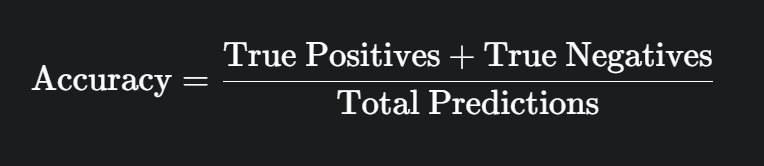

### Precision and Recall

These metrics provide a more nuanced view of performance, especially for the rare positive class (sepsis).

**Precision:** 

The ratio of true positive predictions to the total number of positive predictions. High precision means the model makes very few false alarms. In a clinical setting, this is important to avoid over-treating patients who are not septic, which could lead to unnecessary interventions and stress on resources.

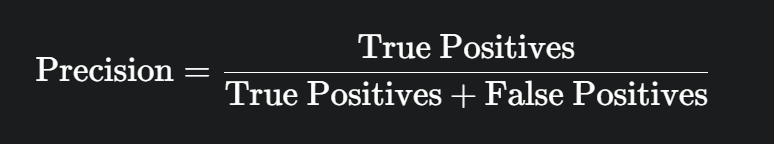

**Recall:** 

The ratio of true positive predictions to the total number of actual positive cases. High recall means the model is good at finding all the actual sepsis cases. In this project, recall is arguably the most critical metric, as missing a sepsis diagnosis (a false negative) can have severe consequences for the patient.

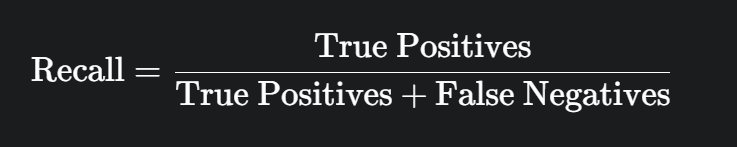

### F1-Score

The F1-score is the harmonic mean of precision and recall. The F1-score provides a single measure that balances precision and recall. A high F1-score indicates that the model is performing well on both fronts, making it a reliable metric for imbalanced datasets. The average='weighted' parameter ensures that the score is calculated by considering the number of samples in each class, which is appropriate for imbalanced data.

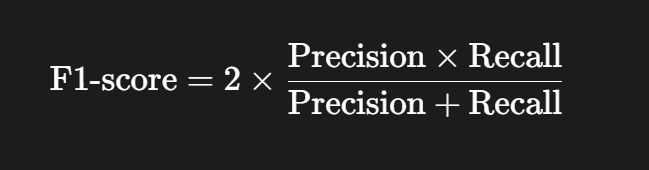

### ROC AUC

The ROC AUC (Area Under the Receiver Operating Characteristic Curve) is a measure of a model's ability to distinguish between classes. The ROC curve plots the True Positive Rate (Recall) against the False Positive Rate at various classification thresholds. A model with a perfect score of 1.0 has a perfect ability to distinguish between positive and negative cases. A score of 0.5 means the model is no better than random guessing. ROC AUC is a robust metric because it is insensitive to class imbalance and provides an overall measure of a model's discriminative power across all possible thresholds. While the project's primary metric is PR AUC (Precision-Recall AUC), ROC AUC is a standard and valuable companion metric for a complete evaluation.

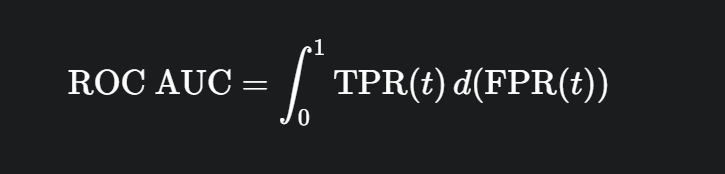
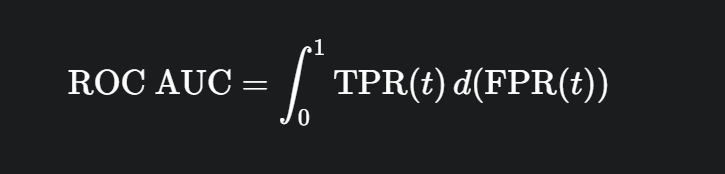

Precision-Recall Trade-off: In many medical applications, there is a trade-off between precision and recall. For example, a model can achieve very high recall by making many false-positive predictions. In sepsis prediction, a high-recall model is preferred to avoid missed diagnoses (false negatives), but a reasonable precision is also required to prevent excessive false alarms.

Training vs. Test Performance: The primary purpose of this evaluation is to compare the model's performance on the training data versus the test data. If the model performs significantly better on the training data, it is a clear sign of overfitting, indicating that the model has memorized the training set rather than learning generalized patterns. The robust performance on the test data is the true measure of a model's utility.

In [20]:
# Load the saved model
#model = tf.keras.models.load_model("/kaggle/input/mild_model_v2/tensorflow2/default/1/time_series_classification_model.h5")

# Predict on the test dataset
y_pred_prob = model.predict(x_test_time_series)  # Get predicted probabilities
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels using np.argmax

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_time_series, y_pred)
f1 = f1_score(y_test_time_series, y_pred, average='weighted')  # Use 'weighted' for multi-class classification
roc_auc = roc_auc_score(y_test_time_series, y_pred_prob, multi_class='ovr')  # Use 'ovr' for multi-class classification
precision = precision_score(y_test_time_series, y_pred, average='weighted')  # Use 'weighted' for multi-class classification
recall = recall_score(y_test_time_series, y_pred, average='weighted')  # Use 'weighted' for multi-class classification

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

2070/2070 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step
Accuracy: 0.9855
F1-score: 0.9784
ROC AUC: 0.5919
Precision: 0.9713
Recall: 0.9855


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
